In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8444 - loss: 0.5331 - val_accuracy: 0.9810 - val_loss: 0.0686 - learning_rate: 0.0010
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0643 - val_accuracy: 0.9850 - val_loss: 0.0537 - learning_rate: 0.0010
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0388 - val_accuracy: 0.9910 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9903 - val_loss: 0.0374 - learning_rate: 0.0010
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9907 - val_loss: 0.0340 - learning_rate: 0.0010
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9908 - val_loss: 0.0335 - learning_rate: 0.0010
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.

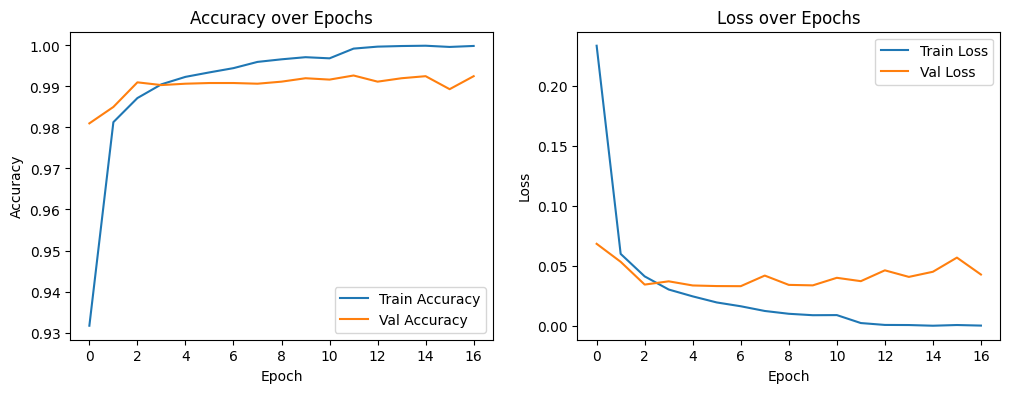

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample Predicted Labels: [7 2 1 0 4 1 4 9 5 9]


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD DATA
# -----------------------------------------------------------------------------
# Load MNIST dataset from TensorFlow's built-in datasets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# 2. PREPROCESS DATA
# -----------------------------------------------------------------------------
# Reshape the images into (28, 28, 1) format and normalize
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values to 0-1
train_images /= 255.0
test_images /= 255.0

# Create a validation split from the training data (e.g., use 10% of data for validation)
validation_split = 0.1
num_validation_samples = int(validation_split * train_images.shape[0])

x_val = train_images[-num_validation_samples:]
y_val = train_labels[-num_validation_samples:]
x_train = train_images[:-num_validation_samples]
y_train = train_labels[:-num_validation_samples]

# 3. BUILD MODEL
# -----------------------------------------------------------------------------
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 4. COMPILE MODEL
# -----------------------------------------------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ADD EARLY STOPPING CALLBACK and reduce learning rate when validation loss
# -----------------------------------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Wait for 10 epochs of no improvement
    restore_best_weights=True
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=5,  # Wait 5 epochs before reducing LR
    min_lr=1e-6  # Minimum learning rate
)


# 5. TRAIN MODEL
# -----------------------------------------------------------------------------
history = model.fit(
    x_train, y_train,
    epochs=100,  # Set high max epochs
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],  # Add both callbacks
    verbose=1
)

# 6. EVALUATE MODEL (optional example on validation set)
# -----------------------------------------------------------------------------
val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 7. SAVE THE MODEL
# -----------------------------------------------------------------------------
model.save("mnist_cnn_model_100e_128b_10sp_5rp.h5")
print("Model saved as mnist_cnn_model.h5")

# 8. SHOW GRAPHICS AND STATISTICS (Training History)
# -----------------------------------------------------------------------------
# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9. MAKE PREDICTIONS ON TEST DATA (EXAMPLE)
# -----------------------------------------------------------------------------
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Print the first few predicted labels (optional)
print("Sample Predicted Labels:", predicted_labels[:10])


Test Loss: 0.0341
Test Accuracy: 0.9881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


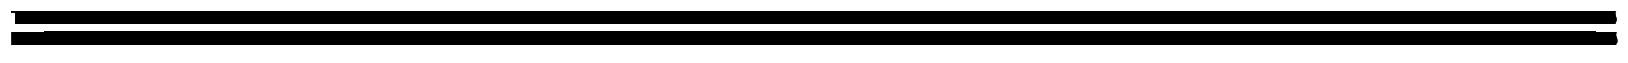

correct: 9881    out of: 10000 

0.9881


In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model("mnist_cnn_model_100e_128b_10sp_5rp.h5")

# Load MNIST dataset from TensorFlow's built-in datasets
(_, _), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Preprocess the test data
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
test_images /= 255.0

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

correct = 0
# Plot a few test images with their predicted and true labels
def plot_images(images, labels, predictions, num_images=10):
    global correct 
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        if predictions[i] == labels[i]:
            correct += 1
        plt.axis('off')
    plt.show()
    return correct

# Display the first 10 test images with their true and predicted 
number_images=10000
plot_images(test_images, test_labels, predicted_labels, num_images=number_images)
print(f"correct: {correct}    out of: {number_images} \n")
accuracy = correct / number_images
print(accuracy)

Test Loss: 0.0313
Test Accuracy: 0.9900
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


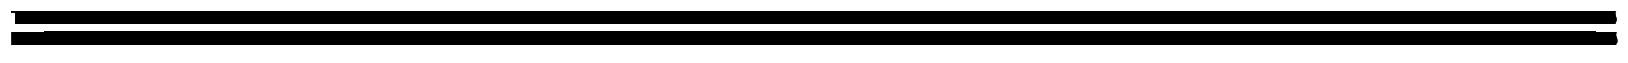

correct: 9900    out of: 10000 

0.99


In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model("mnist_cnn_model_100e_10sp_5rp.h5")

# Load MNIST dataset from TensorFlow's built-in datasets
(_, _), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Preprocess the test data
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
test_images /= 255.0

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

correct = 0
# Plot a few test images with their predicted and true labels
def plot_images(images, labels, predictions, num_images=10):
    global correct 
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        if predictions[i] == labels[i]:
            correct += 1
        plt.axis('off')
    plt.show()
    return correct

# Display the first 10 test images with their true and predicted 
number_images=10000
plot_images(test_images, test_labels, predicted_labels, num_images=number_images)
print(f"correct: {correct}    out of: {number_images} \n")
accuracy = correct / number_images
print(accuracy)